In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
df = pd.read_csv('Rice_deadline.csv')
df.head()

,Unnamed: 0,created_at,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,...,M1,E2,M2,E3,M3,M4,E4,M5,E5,Quality
0,1,2022-07-07T00:14:49+05:30,224,180,88,29.2,07-07-2022,00:14:49,0,14,...,224.0,180.000000,224.000000,0.000000,0.000000,0.007774,0.005600,0.943951,0.961168,9.525591
1,2,2022-07-07T00:15:24+05:30,225,183,95,29.3,07-07-2022,00:15:24,0,15,...,225.0,183.000000,225.000000,0.000000,0.000000,0.007808,0.005693,0.940468,0.952011,9.462392
2,3,2022-07-07T00:15:41+05:30,225,186,90,29.4,07-07-2022,00:15:41,0,15,...,222.8,185.325372,222.759077,1.863330,2.863564,0.007732,0.005768,0.948201,0.944798,9.464994
3,4,2022-07-07T00:16:15+05:30,217,187,90,29.8,07-07-2022,00:16:15,0,16,...,223.0,185.953092,222.956162,2.709982,2.931211,0.007739,0.005786,0.947509,0.942925,9.452170
4,5,2022-07-07T00:16:49+05:30,223,191,90,30.0,07-07-2022,00:16:49,0,16,...,223.4,186.963628,223.346149,2.746634,2.997332,0.007753,0.005818,0.946133,0.939857,9.429950


In [5]:
def rate(initial, final):
    diff = ((df.Day[final] - df.Day[initial])*24 + (df.Hour[final] - df.Hour[initial]))*60 + (df.Mins[final] - df.Mins[initial])
    rate = (df.Quality[initial] - df.Quality[final]) / diff    
    return(rate)

    
print(rate(1, 1990))
print(rate(1991, 2800))
print(rate(2881, 4571))
print(rate(4571, 8600))

0.0005752517860538821
0.010911497036900369
0.0036010291037181993
0.0004794152413793102


In [6]:
df.drop(columns={'Unnamed: 0', 'E1', 'E2', 'E3', 'E4', 'E5', 'M1', 'M2','M3', 'M4', 'M5'}, inplace=True, axis=1)
df

,created_at,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,Secs,Year,Month,Day,Quality
0,2022-07-07T00:14:49+05:30,224,180,88,29.2,07-07-2022,00:14:49,0,14,49,2022,7,7,9.525591
1,2022-07-07T00:15:24+05:30,225,183,95,29.3,07-07-2022,00:15:24,0,15,24,2022,7,7,9.462392
2,2022-07-07T00:15:41+05:30,225,186,90,29.4,07-07-2022,00:15:41,0,15,41,2022,7,7,9.464994
3,2022-07-07T00:16:15+05:30,217,187,90,29.8,07-07-2022,00:16:15,0,16,15,2022,7,7,9.452170
4,2022-07-07T00:16:49+05:30,223,191,90,30.0,07-07-2022,00:16:49,0,16,49,2022,7,7,9.429950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,2022-07-08T20:05:54+05:30,358,432,93,32.5,08-07-2022,20:05:54,20,5,54,2022,7,8,3.410464
8616,2022-07-08T20:06:11+05:30,357,432,93,32.4,08-07-2022,20:06:11,20,6,11,2022,7,8,3.407395
8617,2022-07-08T20:06:28+05:30,358,425,93,32.4,08-07-2022,20:06:28,20,6,28,2022,7,8,3.403916
8618,2022-07-08T20:06:45+05:30,359,426,93,32.4,08-07-2022,20:06:45,20,6,45,2022,7,8,3.400435


<AxesSubplot:>

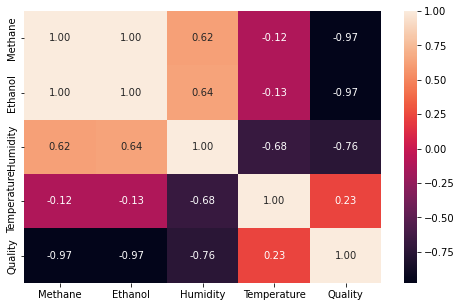

In [7]:
df.drop(columns={'Date', 'Time', 'Hour', 'Mins', 'Secs', 'Year', 'Month', 'Day'}, inplace=True, axis=1)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)


In [8]:
X = df.loc[:, 'Methane':'Temperature']
y = df.loc[:, 'Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [16]:
y_prediction =  regressor.predict(X_test)
y_prediction

array([9.76448347, 9.69012283, 6.95371569, ..., 3.97476428, 3.61957847,
       4.36346379])

In [26]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 socre is  0.973668942833502
mean_sqrd_error is== 0.15209273256536301
root_mean_squared error of is== 0.3899906826648081


In [27]:
filename = 'trained_model_rice.sav'
pickle.dump(LR, open(filename, 'wb'))

In [28]:
df.to_csv('RICE_MODEL.csv')